Импорт библиотек

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Всего датасет содержит 159 записей. Мы предварительно зарезервировали часть датасета для задания по преодолению бейслайна (baseline). В настоящем задании подразумевается работа с датасетом, содержащим 119 записей.

# 0. Применение полиномиальной регрессии для предсказания непрерывного параметра

Представленный набор данных — это набор данных о семи различных типах рыб, продаваемых в некоторой рыбной лавке. Наша цель заключается в том, чтобы предсказать массу рыбы по каким-то косвенным признакам, известным о рыбе. Сами признаки, быть может, нужно синтезировать из тех, что известны.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки с параметрами, указанными в вашем задании. Используйте стратификацию по колонке <code>Species</code>. Стратификация позволит сохранить доли представленных объектов (по представителям типов рыб) в тренировочной и тестовой выборках.

In [ ]:
df = pd.read_csv('fish_train.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
...,...,...,...,...,...,...,...
114,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
115,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
116,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
117,Perch,120.0,20.0,22.0,23.5,6.1100,3.4075


In [ ]:
# Разделите данные на обучающую и тестовую выборки с учетом стратификации
X = df.drop(columns=["Weight"])  # Признаки, за исключением "Width"
y = df["Weight"]  # Целевая переменная "Width"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=df["Species"])

mean_width = X_train["Width"].mean()
print("Выборочное среднее колонки 'Width' в тренировочной выборке:", mean_width)

Выборочное среднее колонки 'Width' в тренировочной выборке: 4.485259999999999


Вычислите выборочное среднее колонки <code>Width</code> полученной тренировочной выборки.

In [ ]:
X_test = X_test.drop(columns=["Species"])
X_test

,Length1,Length2,Length3,Height,Width
31,33.7,36.4,39.6,11.7612,6.5736
42,20.7,22.7,24.2,5.9532,3.6300
54,28.5,30.7,36.2,14.2266,4.9594
95,14.3,15.5,17.4,6.5772,2.3142
11,35.0,38.5,44.1,18.0369,6.3063
34,32.5,35.0,37.3,11.4884,7.7957
22,10.8,11.3,12.6,1.9782,1.2852
88,27.6,30.0,35.1,14.0049,4.8438
40,21.2,23.0,25.8,10.3458,3.6636
30,31.0,33.5,38.7,14.4738,5.7276


In [ ]:
X_train = X_train.drop(columns=["Species"])
X_train

,Length1,Length2,Length3,Height,Width
83,31.8,35.0,40.6,15.4686,6.1306
92,31.9,35.0,40.5,16.2405,5.5890
2,26.5,29.0,34.0,12.4440,5.1340
43,21.1,22.5,25.0,6.4000,3.8000
10,19.0,21.0,22.5,5.9175,3.3075
...,...,...,...,...,...
84,11.4,12.0,13.2,2.2044,1.1484
67,25.4,27.5,28.9,7.1672,4.3350
21,37.0,40.0,42.5,11.7300,7.2250
72,29.5,31.7,35.0,9.4850,5.3550


# 1. Построение базовой модели

Избавьтесь от категориальных признаков и обучите модель линейной регрессии (<code>LinearRegression()</code>) на тренировочном наборе данных. Выполните предсказания для тестового набора данных. Оцените модель при помощи метрики <code>r2_score()</code>.

In [ ]:
# Обучите модель линейной регрессии на тренировочных данных
model = LinearRegression()
model.fit(X_train, y_train)

# Выполните предсказания для тестового набора данных
y_pred = model.predict(X_test)

# Оцените модель при помощи метрики R^2
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.8934687881663089


# 2. Добавление предварительной обработки признаков.

## Использование PCA

При помощи, например, <code>sns.heatmap()</code>, постройте матрицу корреляций признаков тренировочного набора данных и определите тройку наиболее коррелированных между собой признаков.

Тройка наиболее коррелированных признаков:
  Feature1 Feature2  Correlation
1  Length1  Length2     0.999378
5  Length2  Length1     0.999378
7  Length2  Length3     0.993258


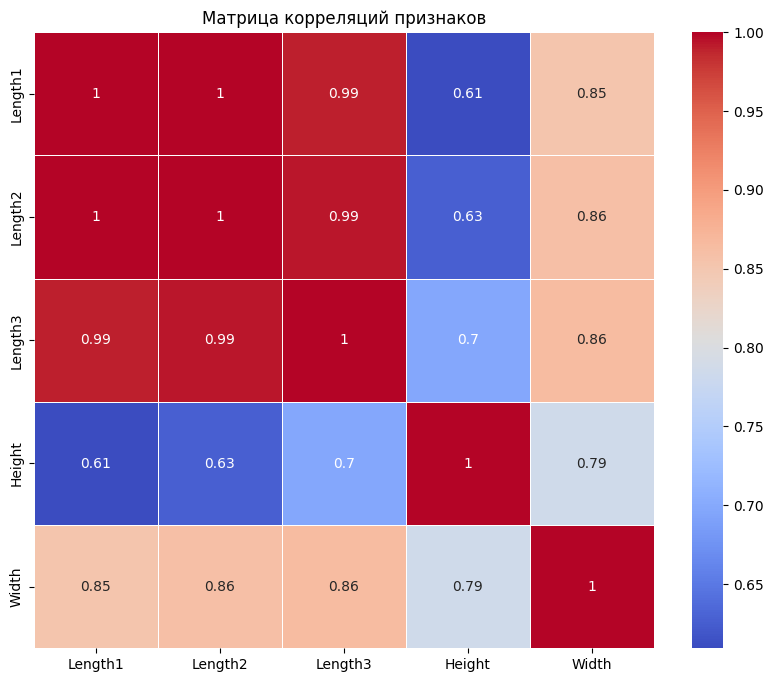

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создайте матрицу корреляций
correlation_matrix = X_train.corr()

# Используйте heatmap для визуализации матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Матрица корреляций признаков")

# Найдите тройку наиболее коррелированных признаков
correlation_stack = correlation_matrix.stack().reset_index()
correlation_stack.columns = ['Feature1', 'Feature2', 'Correlation']
correlation_stack = correlation_stack[correlation_stack['Feature1'] != correlation_stack['Feature2']]

top_correlations = correlation_stack.nlargest(3, 'Correlation')
print("Тройка наиболее коррелированных признаков:")
print(top_correlations)

plt.show()

Линейные модели достаточно плохо реагируют на коррелированные признаки, поэтому от таких признаков имеет смысл избавиться еще до начала обучения.

Для уменьшения количества неинформативных измерений используйте метод главных компонент.

1) Примените метод главных компонент (<code>PCA(n_components=3, svd_solver='full')</code>) для трех найденных наиболее коррелированных признаков.

2) Вычислите долю объясненной дисперсии при использовании только первой главной компоненты.

3) Замените три наиболее коррелированных признака на новый признак <code>Lengths</code>, значения которого совпадают со значениями счетов первой главной компоненты.

In [ ]:
# 1
from sklearn.decomposition import PCA
pca = PCA(n_components=3, svd_solver='full')
X_train_pca = pca.fit_transform(X_train[['Length1', 'Length2', 'Length3']])

# 2
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_1st = explained_variance_ratio[0]
print("Доля объясненной дисперсии (первая главная компонента):", explained_variance_ratio_1st)
# 0.959
# 3
X_train['Lengths'] = X_train_pca[:, 0]
X_train.drop(columns=['Length1', 'Length2', 'Length3'], inplace=True)

Доля объясненной дисперсии (первая главная компонента): 0.9960798779437663


Примените полученное преобразование для тех же признаков в тестовом наборе данных. Обратите внимание, что заново обучать преобразование `PCA` не нужно. Аналогично предыдущему этапу замените три рассмотренных признака на один.

In [ ]:
# Примените PCA к тестовым данным (только к трем признакам)
X_test_pca = pca.transform(X_test[['Length1', 'Length2', 'Length3']])

# Замените три признака в тестовом наборе на новый признак Lengths
X_test['Lengths'] = X_test_pca[:, 0]

# Удалите старые признаки Length1, Length2 и Length3 в тестовом наборе
X_test.drop(columns=['Length1', 'Length2', 'Length3'], inplace=True)

In [ ]:
X_train

,Species,Height,Width,Lengths
83,Bream,15.4686,6.1306,12.057750
92,Bream,16.2405,5.5890,12.049517
2,Bream,12.4440,5.1340,1.687267
43,Roach,6.4000,3.8000,-10.507924
10,Perch,5.9175,3.3075,-14.041230
...,...,...,...,...
84,Smelt,2.2044,1.1484,-29.038530
67,Perch,7.1672,4.3350,-2.917402
21,Perch,11.7300,7.2250,18.894215
72,Roach,9.4850,5.3550,5.465764


Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи <code>r2_score()</code>.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Выполняем предсказания на тестовых данных
y_pred = model.predict(X_test)

# Оценка производительности модели с использованием r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score после преобразования признаков:", r2)
# 0.48
# 0.875

ValueError: ignored

Видно, что точность значительно не изменилась.

## Модификация признаков

Постройте графики зависимостей признаков от целевой переменной, например, при помощи <code>sns.pairplot()</code>.

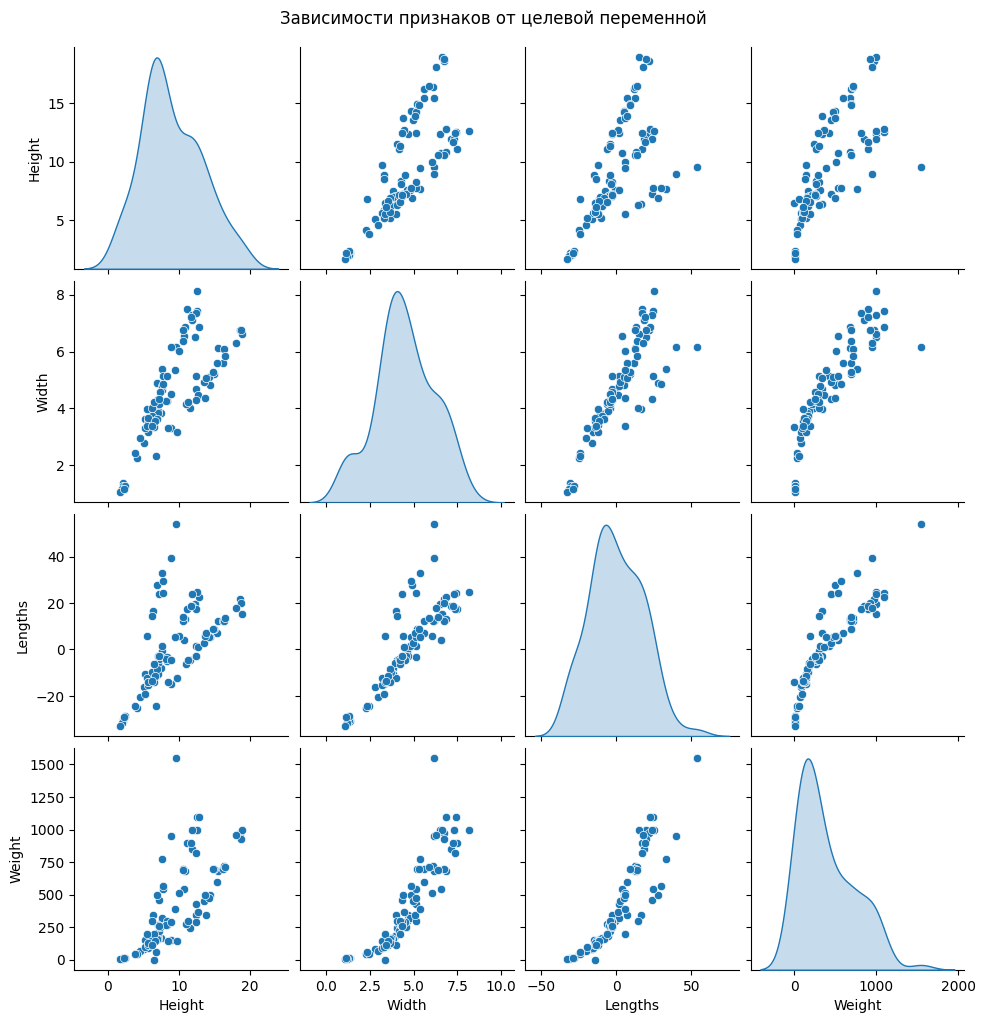

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создайте датафрейм, объединив признаки и целевую переменную
df_visual = X_train.copy()
df_visual['Weight'] = y_train

# Постройте матрицу рассеяния (scatter plot matrix) при помощи pairplot
sns.pairplot(df_visual, diag_kind="kde", height=2.5)
plt.suptitle("Зависимости признаков от целевой переменной", y=1.02)
plt.show()


Видно, что масса, вообще говоря, нелинейно зависит от остальных параметров. Значит, чтобы линейная модель хорошо справлялась с предсказанием, признаки имеет смысл преобразовать так, чтобы зависимость стала более похожей на линейную. Но как придумать такую зависимость?

Логично предположить, что масса рыбы должна каким-то гладким образом зависеть от остальных параметров, отвечающих так или иначе за размеры. Если впомнить, что масса — это произведение плотности на объем, то

$$
m = \rho \cdot V.
$$

Допустим, что средняя плотность у всех рыб одинаковая, и вспомним, что при гомотетии объем объекта зависит от линейных размеров как куб, тогда получим

$$
m\sim V\sim d^3
$$

Все признаки тренировочного и тестового наборов данных, отвечающие так или иначе за размеры (<code>Height, Width, Lengths</code>), возведите в третью степень, и проверьте, стала ли зависимость массы от этих признаков похожа на линейную.

In [ ]:
# Возведите признаки Height, Width и Lengths в третью степень
X_train['Height_cubed'] = X_train['Height'] ** 3
X_train['Width_cubed'] = X_train['Width'] ** 3
X_train['Lengths_cubed'] = X_train['Lengths'] ** 3

X_test['Height_cubed'] = X_test['Height'] ** 3
X_test['Width_cubed'] = X_test['Width'] ** 3
X_test['Lengths_cubed'] = X_test['Lengths'] ** 3

# Уберите старые признаки Height, Width и Lengths
X_train.drop(columns=['Height', 'Width', 'Lengths'], inplace=True)
X_test.drop(columns=['Height', 'Width', 'Lengths'], inplace=True)

Введите выборочное среднее колонки <code>Width</code> тренировочного набора данных после возведения в куб.

In [ ]:
mean_width_cubed_train = X_train['Width_cubed'].mean()
print("Выборочное среднее колонки Width после возведения в куб:", mean_width_cubed_train)

Выборочное среднее колонки Width после возведения в куб: 126.73138191186727


Выберите изображения, соответствующие зависимости <code>Weight</code> от <code>Width</code> до преобразования и после.

Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи `r2_score()`.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Выполняем предсказания на тестовых данных
y_pred = model.predict(X_test)

# Оценка производительности модели с использованием r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score после преобразования признаков и обучения модели:", r2)

R^2 Score после преобразования признаков и обучения модели: 0.9395077680064968


Обратите внимание на то, как такая нехитрая работа с признаками помогла разительно улучшить точность модели!

## Добавление категориальных признаков

Произведите <code>one-hot</code> кодировние категориального признака `Species`, например, с помощью <code>pd.get_dummies()</code>.

Обучите модель линейной регресси на полученных тренировочных данных. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

<b>Примечание</b>: Мы специально использовали стратифицированное разделение, чтобы все значения категориального признака <code>Species</code> присутствовали во всех наборах данных. Но такое возможно не всегда. Про то, как с этим бороться можно почитать, [например, здесь](https://predictivehacks.com/?all-tips=how-to-deal-with-get_dummies-in-train-and-test-dataset).

In [ ]:
X_train_encoded = pd.get_dummies(X_train, columns=["Species"])
X_test_encoded = pd.get_dummies(X_test, columns=["Species"])

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Выполняем предсказания на тестовых данных
y_pred = model.predict(X_test_encoded)

# Оценка производительности модели с использованием r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score после добавления one-hot кодированных категориальных признаков:", r2)

R^2 Score после добавления one-hot кодированных категориальных признаков: 0.9427247481804368


И снова точность возрасла.

Как можно увидеть, после `one-hot` кодирования признаки стали коррелированы. От этого можно избавиться, например, при помощи параметра `drop_first=True`. Заново обучите модель после исправления этого недочета. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# One-hot кодирование категориального признака "Species" с drop_first=True
X_train_encoded = pd.get_dummies(X_train, columns=["Species"], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=["Species"], drop_first=True)

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Выполняем предсказания на тестовых данных
y_pred = model.predict(X_test_encoded)

# Оценка производительности модели с использованием r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score после one-hot кодирования с drop_first=True:", r2)

R^2 Score после one-hot кодирования с drop_first=True: 0.9427247481804383


На таком сравнительно небольшом наборе данных, впрочем, разницы мы не видим.

In [ ]:
X_test_encoded

,Height_cubed,Width_cubed,Lengths_cubed,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
31,1626.877698,284.059829,2332.984457,0,0,0,0,0,1
42,210.984922,47.832147,-1368.274558,0,1,0,0,0,0
54,2879.409033,121.979658,132.383994,0,0,0,0,0,0
95,284.526777,12.393748,-11970.374303,1,0,0,0,0,0
11,5867.940377,250.797891,5782.466232,0,0,0,0,0,0
34,1516.277341,473.767597,1122.574201,0,1,0,0,0,0
22,7.741241,2.122815,-27362.087560,0,0,0,0,1,0
88,2746.882209,113.647166,44.053363,0,0,0,0,0,0
40,1107.368679,49.172711,-904.862973,1,0,0,0,0,0
30,3032.129192,187.896219,882.497830,0,0,0,0,0,0


---

In [ ]:
df1 = pd.read_csv("fish_reserved.csv")

In [ ]:
pca = PCA(n_components=3, svd_solver='full')
X_train_pca = pca.fit_transform(X_train[['Length1', 'Length2', 'Length3']])

# 2
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_1st = explained_variance_ratio[0]
print("Доля объясненной дисперсии (первая главная компонента):", explained_variance_ratio_1st)
# 0.959
# 3
X_train['Lengths'] = X_train_pca[:, 0]
X_train.drop(columns=['Length1', 'Length2', 'Length3'], inplace=True)

KeyError: ignored

In [ ]:
# Подготовка данных для df1
X_df1 = df1
X_df1_encoded = pd.get_dummies(X_df1, columns=["Species"], drop_first=True)  # One-hot кодирование для df1

# Выполняем предсказания на df1
y_pred_df1 = model.predict(X_df1_encoded)

# Пример предсказаний в виде списка [100, 80, 23.5, 60]
predictions_list = y_pred_df1.tolist()
print(predictions_list)

[89.46535482106685, 143.44696836655078, 43.16615813078079, 84.78250872175977, 20.6127122997857, 230.99363448475378, -100.14990649170034, 536.8534159701378, 451.8439081698757, 49.141688925205926, 1363.5686738112595, 242.95623294149982, 640.8798642769411, 991.9536675119425, -194.5863544592322, 670.2092761234876, 125.1117108495389, 770.3221643429683, 1190.217029344797, 50.779784388126245, 612.6718663499425, 186.69752611819808, 29.701263033971145, 219.28448181704562, 326.6076328790855, 648.6193884607255, 416.06615710226515, 34.18472322380387, 165.59306238752174, -35.39803671841241, 898.2416830806615, 512.5616837570406, 566.0744769875048, 172.08635446627636, 62.67177796930446, -10.174105121799244, 153.57114188794515, 888.2826211523247, 738.0442971483521, 168.33752719831614]


In [ ]:
rounded_predictions = [round(pred, 1) for pred in predictions_list]

# Вывод округленных предсказаний
print(rounded_predictions)

[89.5, 143.4, 43.2, 84.8, 20.6, 231.0, -100.1, 536.9, 451.8, 49.1, 1363.6, 243.0, 640.9, 992.0, -194.6, 670.2, 125.1, 770.3, 1190.2, 50.8, 612.7, 186.7, 29.7, 219.3, 326.6, 648.6, 416.1, 34.2, 165.6, -35.4, 898.2, 512.6, 566.1, 172.1, 62.7, -10.2, 153.6, 888.3, 738.0, 168.3]


In [ ]:
len(rounded_predictions)

40

In [ ]:
df1

,Species,Length1,Length2,Length3,Height,Width
0,Roach,19.4,21.0,23.7,6.1146,3.2943
1,Perch,19.3,21.3,22.8,6.3840,3.5340
2,Perch,17.2,19.0,20.2,5.6358,3.0502
3,Parkki,17.5,19.0,21.3,8.3922,2.9181
4,Parkki,16.3,17.7,19.8,7.4052,2.6730
5,Perch,22.0,24.0,25.5,7.2930,3.7230
6,Perch,15.0,16.2,17.2,4.5924,2.6316
7,Pike,40.0,42.5,45.5,6.8250,4.4590
8,Bream,27.6,30.0,35.0,12.6700,4.6900
9,Roach,18.6,20.0,22.2,6.2160,3.5742
